In [46]:
import os
import numpy as np
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [26]:
ratings_path = os.path.join('data','ratings.dat')
submission_path = os.path.join('data','sample_submission.csv')
ratings = gl.SFrame(ratings_path, format='tsv')
submission = gl.SFrame(submission_path, format='csv')

Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/ratings.dat

Parsing completed. Parsed 100 lines in 0.313568 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/ratings.dat

Parsing completed. Parsed 1218325 lines in 0.55161 secs.

Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/sample_submission.csv

Parsing completed. Parsed 100 lines in 0.112673 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/sample_submission.csv

Parsing completed. Parsed 522169 lines in 0.173533 secs.

In [4]:
ratings

user_id,joke_id,rating
34888,111,-9.71875
49651,119,4.75
29027,137,2.625
25235,30,-2.4375
50499,19,2.1875
7300,51,9.3125
30219,9,2.3125
29443,134,3.1875
27069,128,1.21875
24450,120,10.0


In [5]:
pd_ratings = pd.Series(ratings['rating'])
pd_ratings.describe()

count    1.218325e+06
mean     1.700198e+00
std      5.285761e+00
min     -1.000000e+01
25%     -1.906250e+00
50%      2.312500e+00
75%      5.812500e+00
max      1.000000e+01
dtype: float64

Jokes appear to be rated on a scale from -10 to 10. We assume -10 would be an offensive, unfunny joke, and 10 is hilarity.

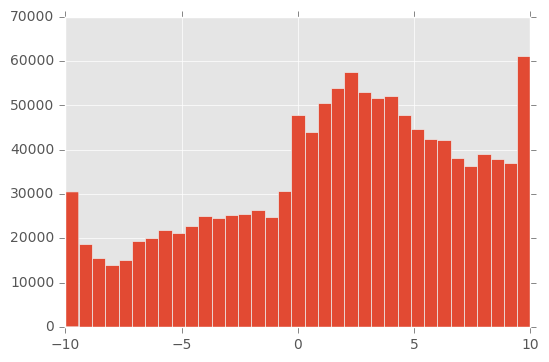

In [6]:
pd_ratings.hist(bins=35)

In [7]:
rec_engine = gl.factorization_recommender.create(observation_data=ratings,
                                                     user_id="user_id",
                                                     item_id="joke_id",
                                                     target='rating',
                                                     solver='als',
                                                     side_data_factorization=False,
                                                     regularization=0,
                                                     max_iterations=100)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 0.823223s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 100      |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 107us        | NA                     |

+---------+--------------+------------------------+

| 0       | 334.52ms     | 4.08983                |

| 1       | 657.344ms    | 3.3215                 |

| 2       | 975.461ms    | 3.17969                |

| 3       | 1.30s        | 3.12704                |

| 4       | 1.62s        | 3.09908                |

| 5       | 1.95s        | 3.08142                |

| 6       | 2.27s        | 3.06899                |

| 7       | 2.60s        | 3.05944                |

| 8       | 2.92s        | 3.05162                |

| 9       | 3.25s        | 3.04493                |

| 10      | 3.57s        | 3.03912                |

| 11      | 3.88s        | 3.03404                |

| 12      | 4.19s        | 3.0296                 |

| 13      | 4.51s        | 3.02571                |

| 14      | 4.82s        | 3.02226                |

| 15      | 5.14s        | 3.01919                |

| 16      | 5.45s        | 3.01643                |

| 17      | 5.79s        | 3.01394                |

| 18      | 6.14s        | 3.01168                |

| 19      | 6.48s        | 3.00961                |

| 20      | 6.79s        | 3.00771                |

| 21      | 7.10s        | 3.00596                |

| 22      | 7.42s        | 3.00433                |

| 23      | 7.74s        | 3.00281                |

| 24      | 8.07s        | 3.0014                 |

| 25      | 8.42s        | 3.00009                |

| 26      | 8.80s        | 2.99887                |

| 27      | 9.13s        | 2.99773                |

| 28      | 9.48s        | 2.99665                |

| 29      | 9.81s        | 2.99565                |

| 30      | 10.15s       | 2.9947                 |

| 31      | 10.48s       | 2.9938                 |

| 32      | 10.80s       | 2.99296                |

| 33      | 11.13s       | 2.99217                |

| 34      | 11.47s       | 2.99143                |

| 35      | 11.79s       | 2.99074                |

| 36      | 12.15s       | 2.99009                |

| 37      | 12.49s       | 2.98948                |

| 38      | 12.83s       | 2.98891                |

| 39      | 13.16s       | 2.98837                |

| 40      | 13.49s       | 2.98787                |

| 41      | 13.85s       | 2.98739                |

| 42      | 14.20s       | 2.98693                |

| 43      | 14.55s       | 2.9865                 |

| 44      | 14.89s       | 2.98609                |

| 45      | 15.25s       | 2.9857                 |

| 46      | 15.60s       | 2.98533                |

| 47      | 15.96s       | 2.98499                |

| 48      | 16.32s       | 2.98466                |

| 49      | 16.68s       | 2.98435                |

| 50      | 17.05s       | 2.98406                |

| 51      | 17.39s       | 2.98379                |

| 52      | 17.76s       | 2.98352                |

| 53      | 18.10s       | 2.98327                |

| 54      | 18.47s       | 2.98304                |

| 55      | 18.82s       | 2.98281                |

| 56      | 19.18s       | 2.98259                |

| 57      | 19.53s       | 2.98239                |

| 58      | 19.88s       | 2.98219                |

| 59      | 20.23s       | 2.982                  |

| 60      | 20.59s       | 2.98182                |

| 61      | 20.93s       | 2.98164                |

| 62      | 21.27s       | 2.98147                |

| 63      | 21.62s       | 2.98131                |

| 64      | 21.96s       | 2.98115                |

| 65      | 22.29s       | 2.981                  |

| 66      | 22.63s       | 2.98086                |

| 67      | 22.97s       | 2.98072                |

| 68      | 23.31s       | 2.98058                |

| 69      | 23.65s       | 2.98045                |

| 70      | 24.01s       | 2.98032                |

| 71      | 24.42s       | 2.9802                 |

| 72      | 24.77s       | 2.98008                |

| 73      | 25.11s       | 2.97997                |

| 74      | 25.45s       | 2.97985                |

| 75      | 25.80s       | 2.97974                |

| 76      | 26.15s       | 2.97964                |

| 77      | 26.49s       | 2.97954                |

| 78      | 26.83s       | 2.97944                |

| 79      | 27.16s       | 2.97934                |

| 80      | 27.52s       | 2.97924                |

| 81      | 27.89s       | 2.97915                |

| 82      | 28.23s       | 2.97906                |

| 83      | 28.57s       | 2.97897                |

| 84      | 28.91s       | 2.97888                |

| 85      | 29.25s       | 2.97879                |

| 86      | 29.61s       | 2.97871                |

| 87      | 29.95s       | 2.97862                |

| 88      | 30.30s       | 2.97854                |

| 89      | 30.65s       | 2.97846                |

| 90      | 30.99s       | 2.97839                |

| 91      | 31.34s       | 2.97831                |

| 92      | 31.71s       | 2.97824                |

| 93      | 32.06s       | 2.97817                |

| 94      | 32.42s       | 2.9781                 |

| 95      | 32.76s       | 2.97803                |

| 96      | 33.10s       | 2.97797                |

| 97      | 33.45s       | 2.9779                 |

| 98      | 33.79s       | 2.97784                |

| 99      | 34.14s       | 2.97778                |

| FINAL   | 34.14s       | 2.97778                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [27]:
predictions = rec_engine.predict(submission)


(-20, 20)

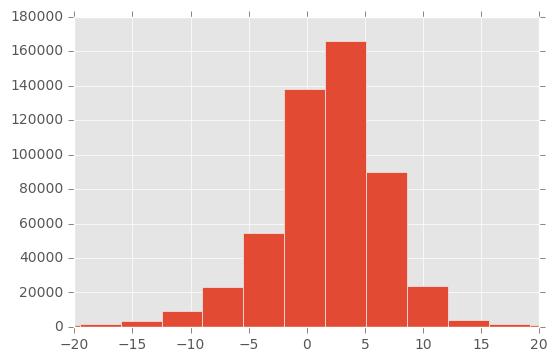

In [32]:
predictions
pd.Series(predictions).hist(bins=75)
plt.xlim(-20, 20)

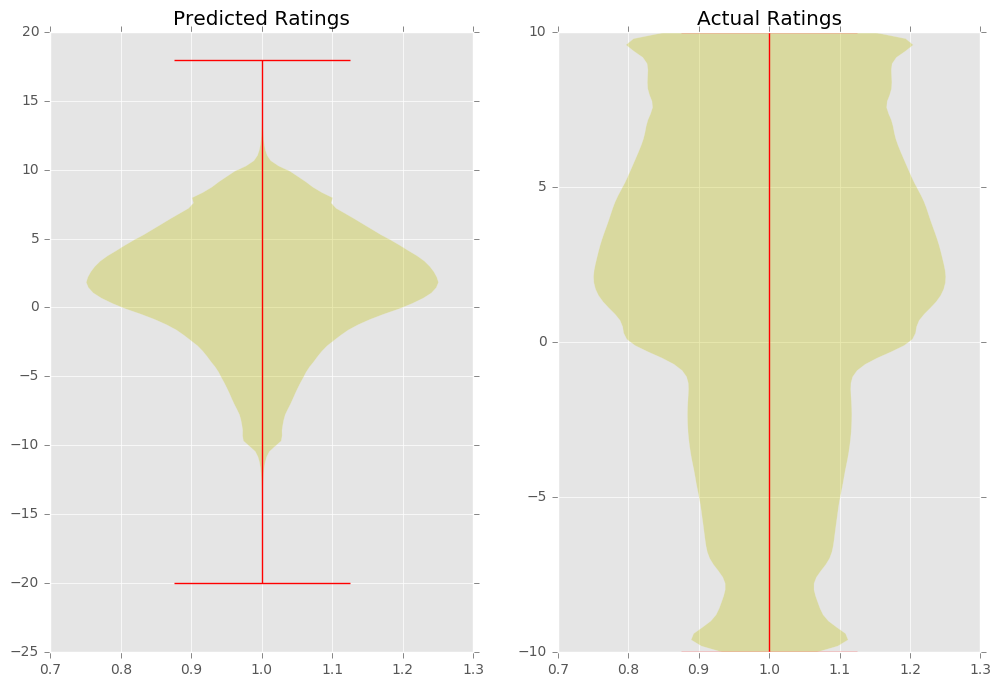

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax1.violinplot(predictions)
ax1.set_title('Predicted Ratings')
ax2 = fig.add_subplot(1,2,2)
ax2.violinplot(pd_ratings)
ax2.set_title('Actual Ratings')

In [60]:
submission['rating'] = predictions
pd_sub = submission.to_dataframe()

In [65]:
user_jokes = pd_sub.groupby(['user_id', 'joke_id'])

In [ ]:
user_jokes.quantile(0.95)